<a href="https://www.kaggle.com/code/anikchand/titanic-mlfromdisaster?scriptVersionId=268421754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [7]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [441]:
# Select numerical columns
numerical_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Impute missing values in 'Age' with the median
# df['Age'] = df['Age'].fillna(df['Age'].median())

# Compute the correlation matrix
df[numerical_cols].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

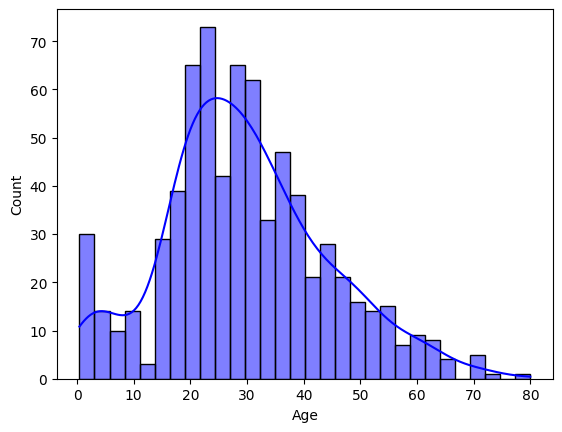

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='blue')

In [443]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [17]:
df_test['Age'] = df_test.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [444]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64

In [445]:
# Create HasCabin binary feature
df['HasCabin'] = df['Cabin'].notna().astype(int)

# Drop the original Cabin column
df = df.drop('Cabin', axis=1)

In [19]:
# Create HasCabin binary feature
df_test['HasCabin'] = df_test['Cabin'].notna().astype(int)

# Drop the original Cabin column
df_test = df_test.drop('Cabin', axis=1)

In [21]:
df_test['Fare'].fillna(df_test['Fare'].mode()[0], inplace=True)

/tmp/ipykernel_37/3766873930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].mode()[0], inplace=True)


In [446]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [23]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,0


In [447]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [26]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [27]:
# Drop the Name column
df = df.drop('Name', axis=1)

In [28]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

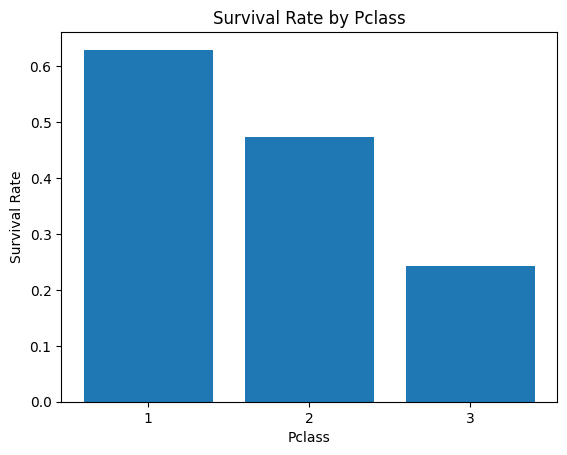

In [30]:
import matplotlib.pyplot as plt

survival_by_pclass = df.groupby('Pclass')['Survived'].mean()

# Create bar plot
plt.bar(survival_by_pclass.index, survival_by_pclass.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.xticks(ticks=[1, 2, 3])
plt.show()

the avg. survival rate of pclass 1 passengers is relatively much higher 

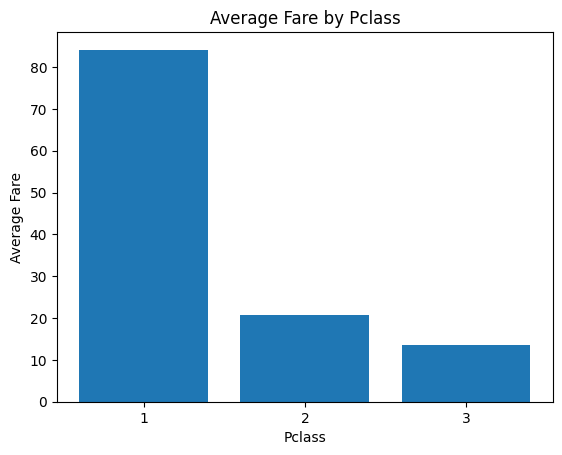

In [31]:
# Group by Pclass and calculate the mean Fare
fare_by_pclass = df.groupby('Pclass')['Fare'].mean()

# Create bar plot
plt.bar(fare_by_pclass.index, fare_by_pclass.values)
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.title('Average Fare by Pclass')
plt.xticks(ticks=[1, 2, 3])
plt.show()

p-class 1 passengers' tickets are more costly than the other 2 classes

In [32]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [34]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [35]:
# Drop the Name column
df = df.drop(columns = ['Ticket', 'PassengerId'], axis=1)

In [36]:
# Drop the Name column -test data
df_test = df_test.drop(columns = ['Ticket', 'PassengerId', 'Name'], axis=1)

In [37]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [38]:
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})

In [39]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,NaN,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


In [41]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,3,1,34.5,0,0,7.8292,Q,0
1,3,0,47.0,1,0,7.0000,S,0
2,2,1,62.0,0,0,9.6875,Q,0
3,3,1,27.0,0,0,8.6625,S,0
4,3,0,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,S,0
414,1,0,39.0,0,0,108.9000,C,1
415,3,1,38.5,0,0,7.2500,S,0
416,3,1,24.0,0,0,8.0500,S,0


In [42]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')

embarked_encoded = ohe.fit_transform(df[['Embarked']])

embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=ohe.get_feature_names_out(['Embarked']))

# Drop the original Embarked column and concatenate the encoded columns
df = df.drop('Embarked', axis=1)
df = pd.concat([df, embarked_encoded_df], axis=1)

df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,1,22.0,1,0,7.2500,NaN,0.0,1.0,0.0
1,1,1,0,38.0,1,0,71.2833,C85,0.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,NaN,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.1000,C123,0.0,1.0,0.0
4,0,3,1,35.0,0,0,8.0500,NaN,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,0.0,1.0,0.0
887,1,1,0,19.0,0,0,30.0000,B42,0.0,1.0,0.0
888,0,3,0,NaN,1,2,23.4500,NaN,0.0,1.0,0.0
889,1,1,1,26.0,0,0,30.0000,C148,0.0,0.0,0.0


In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')

embarked_encoded = ohe.fit_transform(df_test[['Embarked']])

embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=ohe.get_feature_names_out(['Embarked']))

# Drop the original Embarked column and concatenate the encoded columns
df_test = df_test.drop('Embarked', axis=1)
df_test = pd.concat([df_test, embarked_encoded_df], axis=1)

df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,0,0.0,1.0
414,1,0,39.0,0,0,108.9000,1,0.0,0.0
415,3,1,38.5,0,0,7.2500,0,0.0,1.0
416,3,1,24.0,0,0,8.0500,0,0.0,1.0


In [44]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [45]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [47]:
# Drop column
df = df.drop(columns = ['SibSp','Parch'], axis=1)

KeyError: "['SibSp', 'Parch'] not found in axis"

In [48]:
# Drop column
df_test = df_test.drop(columns = ['SibSp','Parch'], axis=1)

In [49]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_Q,Embarked_S,Embarked_nan,FamilySize
0,0,3,1,22.0,7.2500,NaN,0.0,1.0,0.0,2
1,1,1,0,38.0,71.2833,C85,0.0,0.0,0.0,2
2,1,3,0,26.0,7.9250,NaN,0.0,1.0,0.0,1
3,1,1,0,35.0,53.1000,C123,0.0,1.0,0.0,2
4,0,3,1,35.0,8.0500,NaN,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,NaN,0.0,1.0,0.0,1
887,1,1,0,19.0,30.0000,B42,0.0,1.0,0.0,1
888,0,3,0,NaN,23.4500,NaN,0.0,1.0,0.0,4
889,1,1,1,26.0,30.0000,C148,0.0,0.0,0.0,1


In [50]:
df_test

,Pclass,Sex,Age,Fare,HasCabin,Embarked_Q,Embarked_S,FamilySize
0,3,1,34.5,7.8292,0,1.0,0.0,1
1,3,0,47.0,7.0000,0,0.0,1.0,2
2,2,1,62.0,9.6875,0,1.0,0.0,1
3,3,1,27.0,8.6625,0,0.0,1.0,1
4,3,0,22.0,12.2875,0,0.0,1.0,3
...,...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,0,0.0,1.0,1
414,1,0,39.0,108.9000,1,0.0,0.0,1
415,3,1,38.5,7.2500,0,0.0,1.0,1
416,3,1,24.0,8.0500,0,0.0,1.0,1


In [51]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
HasCabin      0
Embarked_Q    0
Embarked_S    0
FamilySize    0
dtype: int64

## Outlier detection

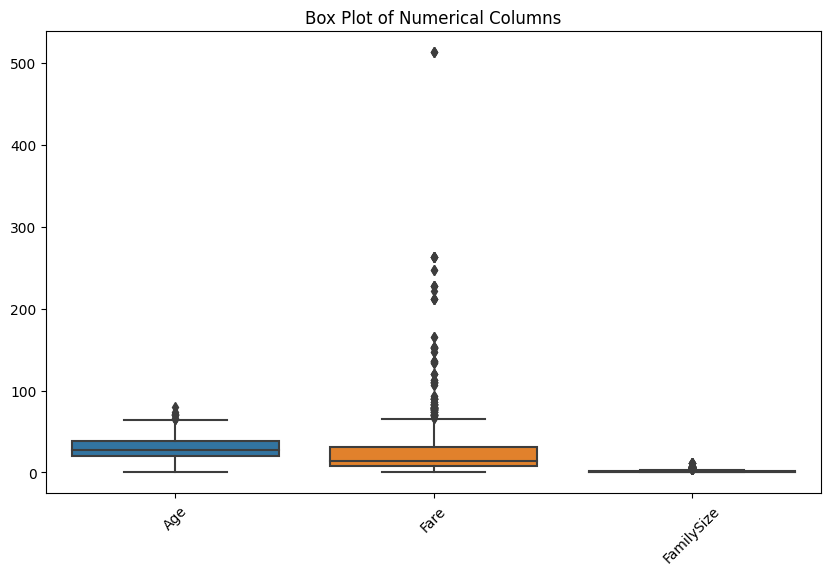

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns to check for outliers
numerical_cols = ['Age', 'Fare', 'FamilySize']

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

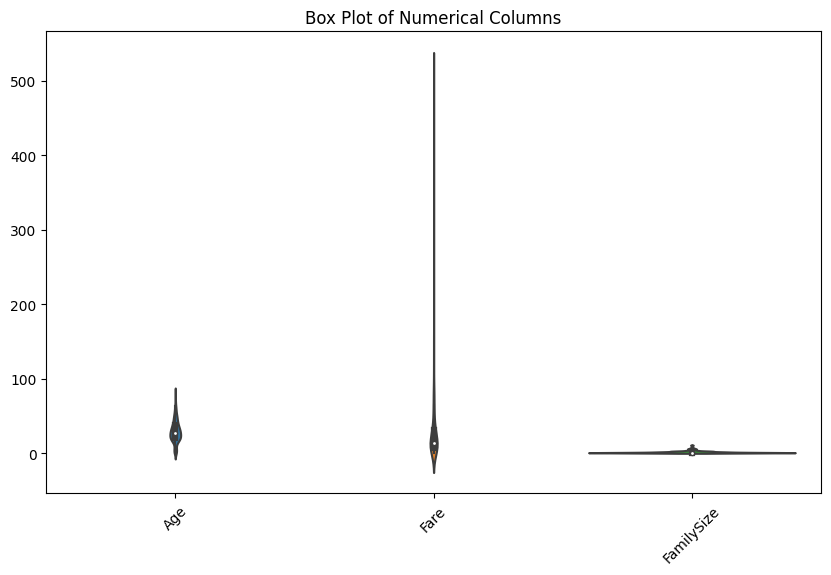

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns to check for outliers
numerical_cols = ['Age', 'Fare', 'FamilySize']

# Create box plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [54]:
import pandas as pd

# Function to detect and calculate percentage of outliers
def calculate_outlier_percentage(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    percentage = (len(outliers) / len(df)) * 100
    return percentage, outliers

# Check percentage of outliers for each numerical column
numerical_cols = ['Age', 'Fare', 'FamilySize']
for col in numerical_cols:
    percentage, outliers = calculate_outlier_percentage(df, col)
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")
    print(f"Number of outliers in {col}: {len(outliers)}")
    print(f"Outlier examples: {outliers.head().tolist() if not outliers.empty else 'None'}\n")

Percentage of outliers in Age: 1.23%
Number of outliers in Age: 11
Outlier examples: [66.0, 65.0, 71.0, 70.5, 65.0]

Percentage of outliers in Fare: 13.02%
Number of outliers in Fare: 116
Outlier examples: [71.2833, 263.0, 146.5208, 82.1708, 76.7292]

Percentage of outliers in FamilySize: 10.21%
Number of outliers in FamilySize: 91
Outlier examples: [5, 7, 6, 5, 7]



/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


### handling outlier in age - 3.7%

In [55]:
# Calculate IQR bounds for Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Set Age to NaN for outliers
df['Age'] = np.where((df['Age'] > upper_bound) | (df['Age'] < lower_bound), np.nan, df['Age'])

df['Age'] = df['Age'].fillna(df['Age'].max())

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


{'whiskers': [<matplotlib.lines.Line2D at 0x7b0c89729150>,
 'caps': [<matplotlib.lines.Line2D at 0x7b0c89736150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b0c89734590>],
 'medians': [<matplotlib.lines.Line2D at 0x7b0c89737290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b0c89737ad0>],
 'means': []}

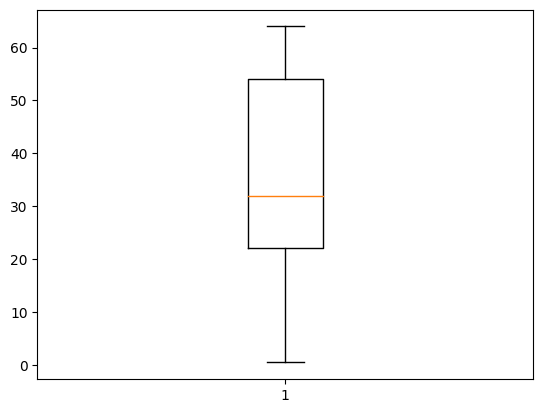

In [56]:
plt.boxplot(df['Age'])

In [57]:
df['Age'].max()

64.0

### handling outlier in Familysize - 10.21%

{'whiskers': [<matplotlib.lines.Line2D at 0x7b0c8bb0cd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7b0c8bb12210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b0c8b8e1c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7b0c8bb11490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b0c8bb63050>],
 'means': []}

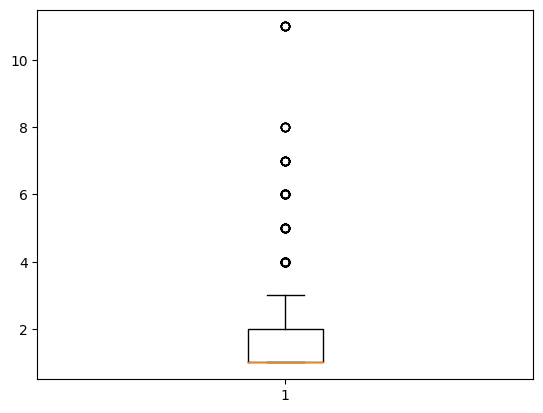

In [58]:
plt.boxplot(df['FamilySize'])

In [59]:
df['FamilySize'] = df['FamilySize'].clip(upper=5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b0c89788410>,
 'caps': [<matplotlib.lines.Line2D at 0x7b0c89789810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b0c89783ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b0c8978ab10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b0c897894d0>],
 'means': []}

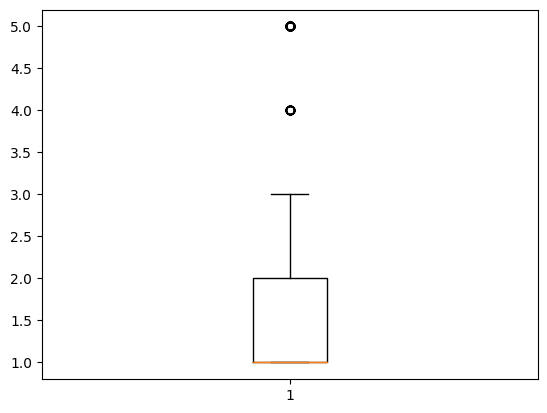

In [60]:
plt.boxplot(df['FamilySize'])

In [61]:
df['FamilySize'].describe()

count    891.000000
mean       1.785634
std        1.195524
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: FamilySize, dtype: float64

### handling outliers in Fare - 13.02%

In [62]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b0c89804e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7b0c89805f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b0c8b8b8a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7b0c89807050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b0c89805890>],
 'means': []}

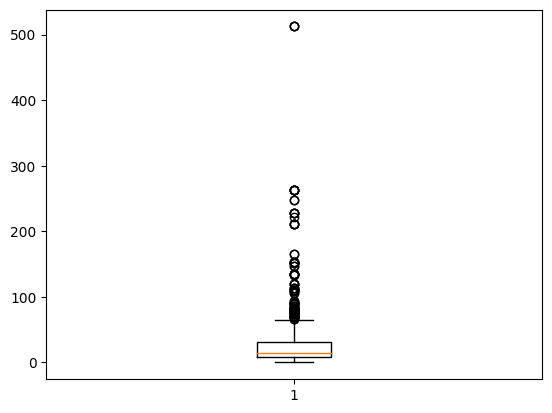

In [63]:
plt.boxplot(df['Fare'])

In [64]:
from sklearn.preprocessing import OneHotEncoder

# Define custom bins including 100–500 category
df['FareBin'] = pd.cut(df['Fare'], bins=[0, 50, 100, 500, float('inf')], 
                       labels=['Low', 'Medium', 'High', 'VeryHigh'])

# Initialize and fit OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity
fare_bin_encoded = encoder.fit_transform(df[['FareBin']])

# Concatenate with the main DataFrame (encoded array will be automatically named)
df = pd.concat([df, pd.DataFrame(fare_bin_encoded, columns=encoder.get_feature_names_out(['FareBin']), index=df.index)], axis=1)

In [65]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_Q,Embarked_S,Embarked_nan,FamilySize,FareBin,FareBin_Low,FareBin_Medium,FareBin_VeryHigh,FareBin_nan
0,0,3,1,22.0,7.2500,NaN,0.0,1.0,0.0,2,Low,1.0,0.0,0.0,0.0
1,1,1,0,38.0,71.2833,C85,0.0,0.0,0.0,2,Medium,0.0,1.0,0.0,0.0
2,1,3,0,26.0,7.9250,NaN,0.0,1.0,0.0,1,Low,1.0,0.0,0.0,0.0
3,1,1,0,35.0,53.1000,C123,0.0,1.0,0.0,2,Medium,0.0,1.0,0.0,0.0
4,0,3,1,35.0,8.0500,NaN,0.0,1.0,0.0,1,Low,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,NaN,0.0,1.0,0.0,1,Low,1.0,0.0,0.0,0.0
887,1,1,0,19.0,30.0000,B42,0.0,1.0,0.0,1,Low,1.0,0.0,0.0,0.0
888,0,3,0,64.0,23.4500,NaN,0.0,1.0,0.0,4,Low,1.0,0.0,0.0,0.0
889,1,1,1,26.0,30.0000,C148,0.0,0.0,0.0,1,Low,1.0,0.0,0.0,0.0


In [74]:
from sklearn.preprocessing import OneHotEncoder

# Define custom bins including 100–500 category
df_test['FareBin'] = pd.cut(df_test['Fare'], bins=[0, 50, 100, 500, float('inf')], 
                       labels=['Low', 'Medium', 'High', 'VeryHigh'])

# Initialize and fit OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity
fare_bin_encoded = encoder.fit_transform(df_test[['FareBin']])

# Concatenate with the main DataFrame (encoded array will be automatically named)
df_test = pd.concat([df_test, pd.DataFrame(fare_bin_encoded, columns=encoder.get_feature_names_out(['FareBin']), index=df_test.index)], axis=1)

In [75]:
df_test

,Pclass,Sex,Age,Fare,HasCabin,Embarked_Q,Embarked_S,FamilySize,FareBin,FareBin_Low,FareBin_Medium,FareBin_VeryHigh,FareBin_nan
0,3,1,34.5,7.8292,0,1.0,0.0,1,Low,1.0,0.0,0.0,0.0
1,3,0,47.0,7.0000,0,0.0,1.0,2,Low,1.0,0.0,0.0,0.0
2,2,1,62.0,9.6875,0,1.0,0.0,1,Low,1.0,0.0,0.0,0.0
3,3,1,27.0,8.6625,0,0.0,1.0,1,Low,1.0,0.0,0.0,0.0
4,3,0,22.0,12.2875,0,0.0,1.0,3,Low,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,0,0.0,1.0,1,Low,1.0,0.0,0.0,0.0
414,1,0,39.0,108.9000,1,0.0,0.0,1,High,0.0,0.0,0.0,0.0
415,3,1,38.5,7.2500,0,0.0,1.0,1,Low,1.0,0.0,0.0,0.0
416,3,1,24.0,8.0500,0,0.0,1.0,1,Low,1.0,0.0,0.0,0.0


In [66]:
df = df.drop(columns=['FareBin', 'FareBin_nan'])
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_Q,Embarked_S,Embarked_nan,FamilySize,FareBin_Low,FareBin_Medium,FareBin_VeryHigh
0,0,3,1,22.0,7.2500,NaN,0.0,1.0,0.0,2,1.0,0.0,0.0
1,1,1,0,38.0,71.2833,C85,0.0,0.0,0.0,2,0.0,1.0,0.0
2,1,3,0,26.0,7.9250,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0
3,1,1,0,35.0,53.1000,C123,0.0,1.0,0.0,2,0.0,1.0,0.0
4,0,3,1,35.0,8.0500,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0
887,1,1,0,19.0,30.0000,B42,0.0,1.0,0.0,1,1.0,0.0,0.0
888,0,3,0,64.0,23.4500,NaN,0.0,1.0,0.0,4,1.0,0.0,0.0
889,1,1,1,26.0,30.0000,C148,0.0,0.0,0.0,1,1.0,0.0,0.0


In [76]:
df_test = df_test.drop(columns=['FareBin', 'FareBin_nan'])
df_test

,Pclass,Sex,Age,Fare,HasCabin,Embarked_Q,Embarked_S,FamilySize,FareBin_Low,FareBin_Medium,FareBin_VeryHigh
0,3,1,34.5,7.8292,0,1.0,0.0,1,1.0,0.0,0.0
1,3,0,47.0,7.0000,0,0.0,1.0,2,1.0,0.0,0.0
2,2,1,62.0,9.6875,0,1.0,0.0,1,1.0,0.0,0.0
3,3,1,27.0,8.6625,0,0.0,1.0,1,1.0,0.0,0.0
4,3,0,22.0,12.2875,0,0.0,1.0,3,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,0,0.0,1.0,1,1.0,0.0,0.0
414,1,0,39.0,108.9000,1,0.0,0.0,1,0.0,0.0,0.0
415,3,1,38.5,7.2500,0,0.0,1.0,1,1.0,0.0,0.0
416,3,1,24.0,8.0500,0,0.0,1.0,1,1.0,0.0,0.0


In [67]:
# df['Fare'] = df['Fare'].clip(upper=100)

In [68]:
# plt.boxplot(df['Fare'])

In [482]:
# sns.histplot(df['Fare'], kde=True)

In [483]:
# df['Fare'].describe()

In [77]:
from sklearn.preprocessing import OneHotEncoder

df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 57], labels=['Child', 'Teen', 'Adult'])

# Initialize and fit OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
age_bin_encoded = encoder.fit_transform(df[['AgeBin']])

# Concatenate with the main DataFrame (encoded array will be automatically named)
df = pd.concat([df, pd.DataFrame(age_bin_encoded, columns=encoder.get_feature_names_out(['AgeBin']), index=df.index)], axis=1)

KeyError: 'Age'

In [78]:
df

,Survived,Pclass,Sex,Fare,Cabin,Embarked_Q,Embarked_S,Embarked_nan,FamilySize,FareBin_Low,FareBin_Medium,FareBin_VeryHigh,AgeBin_Child,AgeBin_Teen,AgeBin_nan
0,0,3,1,7.2500,NaN,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,71.2833,C85,0.0,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0
2,1,3,0,7.9250,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,53.1000,C123,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0
4,0,3,1,8.0500,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,13.0000,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
887,1,1,0,30.0000,B42,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
888,0,3,0,23.4500,NaN,0.0,1.0,0.0,4,1.0,0.0,0.0,0.0,0.0,1.0
889,1,1,1,30.0000,C148,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from sklearn.preprocessing import OneHotEncoder

df_test['AgeBin'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 57], labels=['Child', 'Teen', 'Adult'])

# Initialize and fit OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
age_bin_encoded = encoder.fit_transform(df_test[['AgeBin']])

# Concatenate with the main DataFrame (encoded array will be automatically named)
df_test = pd.concat([df_test, pd.DataFrame(age_bin_encoded, columns=encoder.get_feature_names_out(['AgeBin']), index=df_test.index)], axis=1)

In [80]:
df = df.drop(columns=['Age', 'AgeBin'])

KeyError: "['Age', 'AgeBin'] not found in axis"

In [81]:
df_test = df_test.drop(columns=['Age', 'AgeBin'])

In [82]:
df

,Survived,Pclass,Sex,Fare,Cabin,Embarked_Q,Embarked_S,Embarked_nan,FamilySize,FareBin_Low,FareBin_Medium,FareBin_VeryHigh,AgeBin_Child,AgeBin_Teen,AgeBin_nan
0,0,3,1,7.2500,NaN,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,71.2833,C85,0.0,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0
2,1,3,0,7.9250,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,53.1000,C123,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0
4,0,3,1,8.0500,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,13.0000,NaN,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
887,1,1,0,30.0000,B42,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
888,0,3,0,23.4500,NaN,0.0,1.0,0.0,4,1.0,0.0,0.0,0.0,0.0,1.0
889,1,1,1,30.0000,C148,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df_test

,Pclass,Sex,Fare,HasCabin,Embarked_Q,Embarked_S,FamilySize,FareBin_Low,FareBin_Medium,FareBin_VeryHigh,AgeBin_Child,AgeBin_Teen,AgeBin_nan
0,3,1,7.8292,0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
1,3,0,7.0000,0,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1,9.6875,0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
3,3,1,8.6625,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,3,0,12.2875,0,0.0,1.0,3,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,8.0500,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0
414,1,0,108.9000,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
415,3,1,7.2500,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0
416,3,1,8.0500,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features and target (updated)
features = ['Pclass', 'Sex', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'FamilySize', 
            'FareBin_Low', 'FareBin_Medium', 'FareBin_VeryHigh', 
            'AgeBin_Child', 'AgeBin_Teen']  # Adjust if Adult/Senior exist
X = df[features]
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=323, C=0.8, penalty=None, solver='lbfgs')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

KeyError: "['HasCabin'] not in index"

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Features and target (updated with current features)
features = ['Pclass', 'Sex', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'FamilySize', 
            'FareBin_Low', 'FareBin_Medium', 'FareBin_VeryHigh', 
            'AgeBin_Child', 'AgeBin_Teen']  # Adjust if AgeBin_Adult/Senior exist
X = df[features]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = SVC(random_state=42, kernel='rbf')  # Default RBF kernel, adjustable
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.2f}")

SVM Model Accuracy: 0.65


In [502]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features and target (updated)
features = ['Pclass', 'Sex', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'FamilySize', 
            'FareBin_Low', 'FareBin_Medium', 'FareBin_VeryHigh', 
            'AgeBin_Child', 'AgeBin_Teen']  # Adjust if AgeBin_Adult/Senior exist
X = df[features]
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42, n_estimators=450)  # Similar to your previous setup
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.82


In [495]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Features and target (updated)
features = ['Pclass', 'Sex', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'FamilySize', 
            'FareBin_Low', 'FareBin_Medium', 'FareBin_VeryHigh', 
            'AgeBin_Child', 'AgeBin_Teen']  # Adjust if AgeBin_Adult/Senior exist
X = df[features]
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81


In [497]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450], 'max_depth': [10, 20, 25, 30, 40, None], 'min_samples_split': [2, 3, 5, 8, 10]}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.2f}")
print(f"Best parameters: {grid_search.best_params_}")

Tuned Model Accuracy: 0.82
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 450}


In [498]:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.2f}")
print(f"Best parameters: {grid_search.best_params_}")

Tuned Model Accuracy: 0.82
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Features and target
features = ['Pclass', 'Sex', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'FamilySize', 
            'FareBin_Low', 'FareBin_Medium', 'FareBin_VeryHigh', 
            'AgeBin_Child', 'AgeBin_Teen']  # Adjust if AgeBin_Adult/Senior exist
# Filter features to only those present in df
features = [col for col in features if col in df.columns]
X = df[features]
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models (Layer 1)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                              learning_rate=0.1, max_depth=3, n_estimators=100)
rf_model = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=10, n_estimators=450)

# Define meta-model (Layer 2)
meta_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Simpler meta-model

# Create the stacking ensemble
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    final_estimator=meta_model,
    cv=5  # 5-fold cross-validation for out-of-fold predictions
)

# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {accuracy}")
print(f"Used features: {X.columns.tolist()}")

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Sex: object

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

# Features and target
features = ['Pclass', 'Sex', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'FamilySize', 
            'FareBin_Low', 'FareBin_Medium', 'FareBin_VeryHigh', 
            'AgeBin_Child', 'AgeBin_Teen'] 
features = [col for col in features if col in df.columns]  # Filter existing columns
X = df[features]
y = df['Survived']

# Scale only the numerical feature (Fare)
if 'Fare' in df.columns:
    scaler = StandardScaler()
    X['Fare'] = scaler.fit_transform(X[['Fare']])
else:
    print("Warning: 'Fare' not found. Scaling skipped.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert to numpy arrays and reshape y for binary classification
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Build the ANN model

model = Sequential([
    Dense(128, input_shape=(len(features),)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),

    Dense(16),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.22),

    Dense(1, activation='sigmoid')
])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-5)

# Display model summary before training
model.summary()

# Compile the model
loss_fn = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05)
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=350,
    batch_size=16,
    validation_split=0.25,
    callbacks=[reduce_lr],
    verbose=1
)


# Predict and evaluate
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model Accuracy: {accuracy:.2f}")
print(f"Used features: {df[features].columns.tolist()}")

/tmp/ipykernel_37/2587758380.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = scaler.fit_transform(X[['Fare']])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,377 (52.25 KB)

 Trainable params: 12,897 (50.38 KB)

 Non-trainable params: 480 (1.88 KB)

Epoch 1/350
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5375 - loss: 0.8950 - val_accuracy: 0.7246 - val_loss: 0.6348 - learning_rate: 0.0010
Epoch 2/350
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6337 - loss: 0.7003 - val_accuracy: 0.7066 - val_loss: 0.6073 - learning_rate: 0.0010
Epoch 3/350
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6845 - loss: 0.6277 - val_accuracy: 0.7784 - val_loss: 0.5993 - learning_rate: 0.0010
Epoch 4/350
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6861 - loss: 0.6301 - val_accuracy: 0.8024 - val_loss: 0.5851 - learning_rate: 0.0010
Epoch 5/350
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7566 - loss: 0.5904 - val_accuracy: 0.7964 - val_loss: 0.5669 - learning_rate: 0.0010
Epoch 6/350
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6857 - loss: 0.6362 - val_accuracy: 0.7964 - val_loss: 0.5509 - learning_rate: 0.0010
Epoch 7/350
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7501 - loss: 0.5684 - val_ac

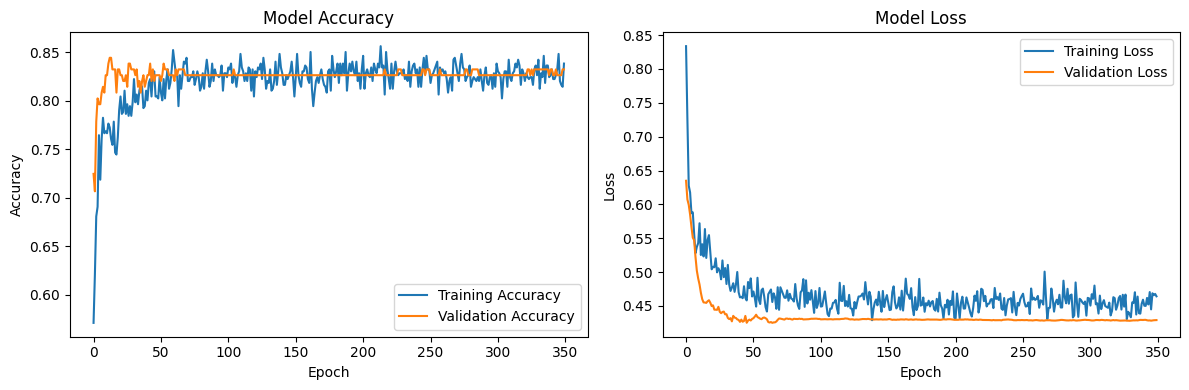

In [96]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [97]:
model.save("model.keras")

In [104]:
df_test.drop(columns = ['AgeBin_nan'], inplace=True)
df_test

,Pclass,Sex,Fare,HasCabin,Embarked_Q,Embarked_S,FamilySize,FareBin_Low,FareBin_Medium,FareBin_VeryHigh,AgeBin_Child,AgeBin_Teen
0,3,1,7.8292,0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0
1,3,0,7.0000,0,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0
2,2,1,9.6875,0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0
3,3,1,8.6625,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0
4,3,0,12.2875,0,0.0,1.0,3,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,8.0500,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0
414,1,0,108.9000,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
415,3,1,7.2500,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0
416,3,1,8.0500,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0


In [105]:
df_test.isnull().sum()

Pclass              0
Sex                 0
Fare                0
HasCabin            0
Embarked_Q          0
Embarked_S          0
FamilySize          0
FareBin_Low         0
FareBin_Medium      0
FareBin_VeryHigh    0
AgeBin_Child        0
AgeBin_Teen         0
dtype: int64

In [107]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/kaggle/working/model.keras')

In [108]:
from sklearn.preprocessing import StandardScaler
import numpy as np

features = ['Pclass', 'Sex', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'FamilySize', 
            'FareBin_Low', 'FareBin_Medium', 'FareBin_VeryHigh', 
            'AgeBin_Child', 'AgeBin_Teen'] 
features = [col for col in features if col in df.columns]  # Filter existing columns
X = df_test[features]

scaler = StandardScaler()
X['Fare'] = scaler.fit_transform(X[['Fare']])

X = X.to_numpy()

y_pred_prob = model.predict(X)
y_pred = (y_pred_prob > 0.5).astype(int)

/tmp/ipykernel_37/1762443806.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = scaler.fit_transform(X[['Fare']])


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [110]:
submission = pd.DataFrame({
    'PassengerId': range(892, 892 + len(y_pred)),
    'Survived': y_pred.flatten()
})

submission.to_csv('submission.csv', index=False)

In [111]:
df_sub = pd.read_csv('/kaggle/working/submission.csv')
df_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
